In [5]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import symbols, Matrix
from fractions import Fraction
xxx = symbols("x")

# Interpolação Polinomial

In [6]:
def plot(f, interval=[0, 10]):
    x = np.linspace(interval[0], interval[1], 1000)
    # y = f(x)
    y = list()
    for i in range(len(x)):
        y.append(f(x[i]))
    y = np.array(y)
    plt.figure()
    plt.plot(x, y, "bh", linewidth=1.1)



In [7]:
def lagrange_interpolation(lx, ly, x):
    # need: len(lx) == len(ly),  max(lx) >= x >= min(lx)
    res = 0
    for i in range(len(lx)):
        L = 1
        for j in range(len(lx)):
            if i != j:
                L *= (x - lx[j]) / (lx[i] - lx[j])
        res += L * ly[i]
    return res


In [8]:

def NumpyLagrange(lx,ly):
    #lx,ly = np.array(lx,dtype='float64'), np.array(ly,dtype='float64')
    res = np.poly1d([0])
    for i in range(len(lx)):
        L = np.poly1d([1])
        for j in range(len(lx)):
            if i != j:
                q= lx[i] - lx[j]
                L = np.polymul(L , np.poly1d( [ 1/q,-lx[j]/q ] ))
        L = np.polymul(L,[ly[i]])
        res = np.polyadd(res,L)
    return res

#a = see_lagrange([1,2,3],[3,4,3])
#a.coef
a = NumpyLagrange([2,3,4,5,6,7],[0.13,0.19,0.27,0.38,0.51,0.67])
a.coef

array([ 3.33333333e-04, -7.50000000e-03,  6.50000000e-02, -2.57500000e-01,
        5.29666667e-01, -3.10000000e-01])

In [9]:
print(a)

           5          4         3          2
0.0003333 x - 0.0075 x + 0.065 x - 0.2575 x + 0.5297 x - 0.31


0.32187499999997804


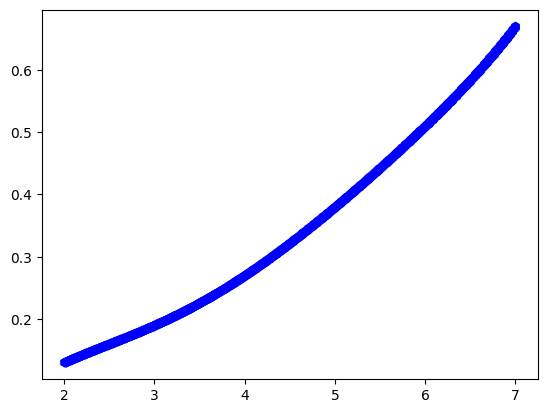

In [10]:
def f(x): return np.polyval(a,x)
plot(f,[2,7])
print(f(4.5))

In [11]:
a = DividedDiferences([2,3,4,5,6,7],[13,19,27,38,51,67])

a.coefs


NameError: name 'DividedDiferences' is not defined

In [ ]:
np.set_printoptions(precision=5)
a.deriv(5)

poly1d([0.04])

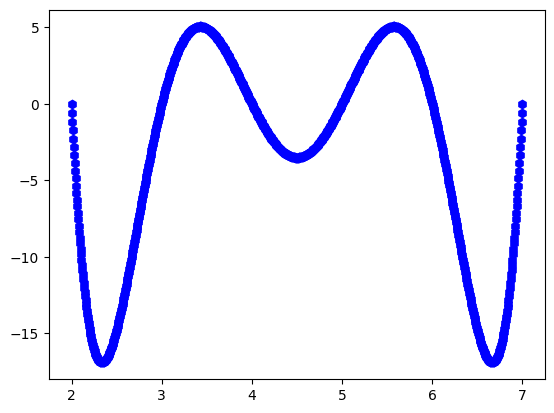

In [43]:
b = np.poly1d([2,3,4,5,6,7],True)
def f(x): return np.polyval(b,x)
plot(b,[2,7])
y = []
for p in np.linspace(2,7,10000):
    y.append(f(p))


In [44]:
max(y)

5.049041873824535

In [ ]:
y

[0.0,
 -0.059937515026831534,
 -0.11973817137368314,
 -0.17940213765450608,
 -0.23892958234773687,
 -0.29832067380993976,
 -0.3575755802639833,
 -0.4166944698181396,
 -0.4756775104360713,
 -0.534524869969573,
 -0.5932367161340153,
 -0.6518132165238057,
 -0.7102545385996564,
 -0.7685608497031353,
 -0.8267323170412055,
 -0.8847691076998672,
 -0.9426713886350626,
 -1.000439326677224,
 -1.0580730885303637,
 -1.115572840772984,
 -1.1729387498526194,
 -1.2301709820958422,
 -1.2872697036982572,
 -1.344235080735416,
 -1.4010672791473553,
 -1.4577664647531492,
 -1.514332803250909,
 -1.5707664602005025,
 -1.6270676010444731,
 -1.6832363910962158,
 -1.7392729955499817,
 -1.7951775794590503,
 -1.8509503077648333,
 -1.9065913452768655,
 -1.962100856678262,
 -2.017479006533904,
 -2.072725959271338,
 -2.127841879202606,
 -2.1828269305069625,
 -2.2376812772399717,
 -2.292405083342601,
 -2.3469985126102983,
 -2.4014617287284636,
 -2.4557948952524384,
 -2.5099981756111447,
 -2.5640717331107226,
 -2.6180

In [ ]:
max(y)

5.049041873824535

In [ ]:
class LagrangeInterpolation:
    def __init__(self, lx, ly):
        self.lx = lx
        self.ly = ly
    def polinom(self, x):
        res = 0
        for i in range(len(self.lx)):
            L = 1
            for j in range(len(self.lx)):
                if i != j:
                    L *= (x - self.lx[j]) / (self.lx[i] - self.lx[j])
            res += L * self.ly[i]
        return res



In [ ]:
class DividedDiferences:
    def __init__(self, x, y):
        # x vetor de mesmo tamanho que y
        self.x = x
        self.y = y
        self.n = len(x)
        print(f"n = {self.n}")
        # self.coefs = self.find_coefs()
        # def find_coefs(self):
        f = np.zeros((self.n, self.n))
        for k in range(self.n):
            f[k, 0] = self.y[k]
        for i in range(1, self.n):
            for j in range(1, i + 1):
                f[i, j] = (f[i, j - 1] - f[i - 1, j - 1]) / (self.x[i] - self.x[i - j])
        self.coefs = f

    def polinom(self, p):
        soma = 0
        for i in range(self.n):
            res = self.coefs[i, i]
            for j in range(i):
                res *= p - self.x[j]
            soma += res
        return soma



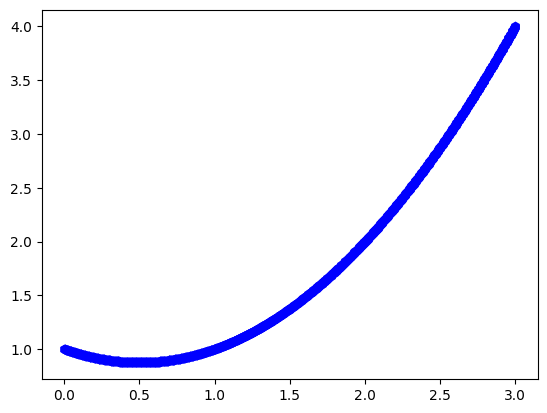

In [ ]:
def f(x):
    return lagrange_interpolation([0, 2, 3], [1, 2, 4], x)


plot(f, [0, 3])



n = 3


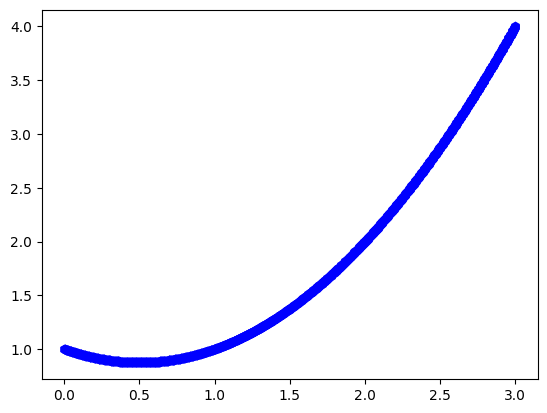

In [ ]:
a = DividedDiferences([0, 2, 3], [1, 2, 4])
plot(a.polinom, [0, 3])



# Polinômio de Hermite

In [ ]:
class HermiteDiferences:
    def __init__(self, x, y, Dy):
        # x vetor de mesmo tamanho que y
        self.x = x
        self.y = y
        self.Dy = Dy
        n = len(x)
        z = []
        Q = np.zeros((2 * n, 2 * n))
        for i in range(n):
            z.append(self.x[i])
            z.append(self.x[i])
            Q[2 * i, 0] = self.y[i]
            Q[2 * i + 1, 0] = self.y[i]
            Q[2 * i + 1, 1] = self.Dy[i]
            if i != 0:
                Q[2 * i, 1] = (Q[2 * i, 0] - Q[2 * i - 1, 0]) / (
                    z[2 * i] - z[2 * i - 1]
                )
        for i in range(2, 2 * n):
            for j in range(2, i + 1):
                Q[i, j] = (Q[i, j - 1] - Q[i - 1, j - 1]) / (z[i] - z[i - j])
        self.Q = Q
        self.z = z
        self.coefs = [Q[i,i] for i in range(len(Q))]

    def polinom(self, p):
        soma = 0
        for i in range(len(self.Q)):
            res = self.Q[i, i]
            for j in range(i):
                res *= p - self.z[j]
            soma += res
        return soma



[[ 0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 0.00000e+00  7.50000e+01  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 2.25000e+02  7.50000e+01  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 2.25000e+02  7.70000e+01  6.66667e-01  2.22222e-01  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 3.83000e+02  7.90000e+01  1.00000e+00  6.66667e-02 -3.11111e-02
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 3.83000e+02  8.00000e+01  5.00000e-01 -2.50000e-01 -6.33333e-02
  -6.44444e-03  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 6.23000e+02  8.00000e+01  0.00000e+00 -1.00000e-01  3.00000e-02
   1.16667e-02  2.26389e-03  0.00000e+00  0.00000e+00  0.00000e+00]
 [ 6.23000e+02  7.40000e+01 -2.00000e+00 -6.66667e-01 -

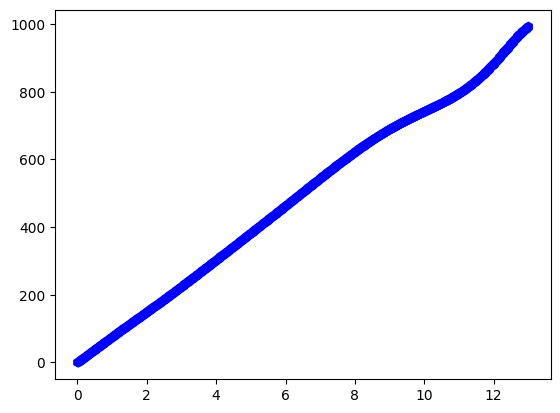

In [ ]:
a = HermiteDiferences([0,3,5,8,13],[0,225,383,623,993],[75,77,80,74,72])
print(a.Q)
plot(a.polinom,[0,13])

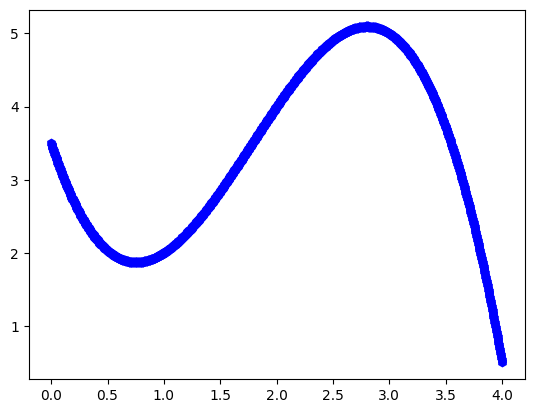

In [ ]:
a = HermiteDiferences([1, 3], [2, 5], [1, -1])
plot(a.polinom, [0, 4])



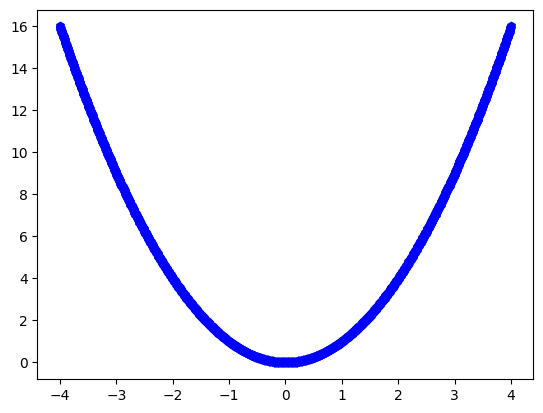

In [ ]:
b = HermiteDiferences([-1, 0, 1, 3], [1, 0, 1, 9], [-2, 0, 2, 6])
plot(b.polinom, [-4, 4])



In [ ]:
for x in np.linspace(-10, 10, 20):
    print(x)
    if b.polinom(x) != x ** 2:
        print("erro = ", abs(b.polinom(x) - x ** 2))



-10.0
-8.947368421052632
-7.894736842105264
-6.842105263157895
-5.7894736842105265
-4.736842105263158
-3.6842105263157894
-2.6315789473684212
erro =  8.881784197001252e-16
-1.578947368421053
-0.526315789473685
0.5263157894736832
erro =  2.220446049250313e-16
1.5789473684210513
2.6315789473684212
erro =  8.881784197001252e-16
3.6842105263157894
erro =  1.7763568394002505e-15
4.7368421052631575
erro =  3.552713678800501e-15
5.789473684210526
6.842105263157894
7.894736842105264
erro =  7.105427357601002e-15
8.94736842105263
10.0


# Splines cúbicos

In [ ]:
class NaturalCubicSpline:
    def __init__(self, lx, ly):
        self.lx = lx
        self.ly = ly
        self.n = len(lx)
        self.a = self.ly[:-1]
        self.b, self.c, self.d = self.gera_spline()
        self.coefs = [self.a, self.b, self.c, self.d]
    def gera_spline(self):
        h = list()
        for i in range(self.n - 1):
            h.append(self.lx[i + 1] - self.lx[i])
        alpha = [0.0]
        for i in range(1, self.n - 1):
            res = (3 * (self.ly[i + 1] - self.ly[i]) / h[i]) - ( 3 * (self.ly[i] - self.ly[i - 1]) / h[i - 1] )
            alpha.append(res)
        l = [1.0]
        u = [0.0]
        z = [0.0]
        for i in range(1, self.n - 1):
            l.append(2 * (self.lx[i + 1] - self.lx[i - 1]) - (h[i - 1] * u[i - 1]))
            u.append(h[i] / l[i])
            z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
        l.append(1.0)
        z.append(0.0)
        b = np.array([0.0 for i in range(self.n)])
        c = np.array([0.0 for i in range(self.n)])
        d = np.array([0.0 for i in range(self.n)])
        for j in range(self.n - 2, -1, -1):
            c[j] = z[j] - u[j] * c[j + 1]
            b[j] = (self.ly[j + 1] - self.ly[j]) / h[j] - h[j] * ( c[j + 1] + 2 * c[j] ) / 3
            d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        return b[:-1], c[:-1], d[:-1]

    def polinom(self, p):
        if p < self.lx[0] or p > self.lx[self.n - 1]:
            return 0
        for i in range(self.n - 1):
            if p >= self.lx[i] and p <= self.lx[i+1]:
                X = p - self.lx[i]
                return (  self.a[i] + self.b[i] * X + self.c[i] * X ** 2 + self.d[i] * X ** 3 )




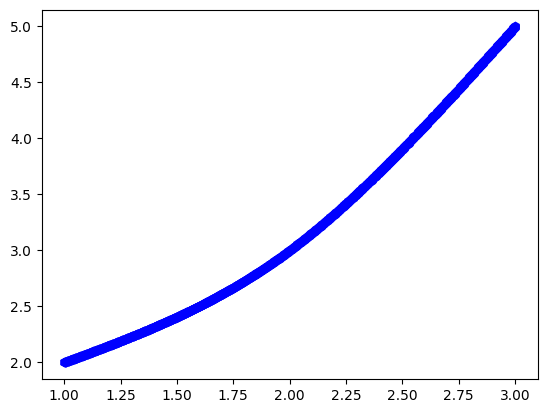

In [ ]:
sss = NaturalCubicSpline([1, 2, 3], [2, 3, 5])
plot(sss.polinom, [1, 3])



In [ ]:
class FixedCubicSpline:
    def __init__(self, lx, ly, FPO, FPN):
        self.lx = lx
        self.ly = ly
        self.n = len(lx)
        self.a = self.ly[:-1]
        self.FPO = FPO
        self.FPN = FPN
        self.b, self.c, self.d = self.gera_spline()
        self.coefs = [self.a, self.b, self.c, self.d]
    def gera_spline(self):
        h = list()
        for i in range(self.n - 1):
            h.append(self.lx[i + 1] - self.lx[i])
        alpha = [3*(self.ly[1]-self.ly[0])/h[0] - 3*self.FPO]
        for i in range(1,self.n-1):
            res = (3 * (self.ly[i + 1] - self.ly[i]) / h[i]) - (3 * (self.ly[i] - self.ly[i - 1]) / h[i - 1])
            alpha.append(res)


        alpha.append(3*self.FPN - 3*(self.ly[self.n-1]-self.ly[self.n-2])/h[self.n-2])


        l = [2*h[0]]
        u = [0.5]
        z = [alpha[0]/l[0]]
        for i in range(1, self.n - 1):
            l.append(2 * (self.lx[i + 1] - self.lx[i - 1]) - (h[i - 1] * u[i - 1]))
            u.append(h[i] / l[i])
            z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
        l.append(h[self.n-2]*(2-u[self.n-2]))  ###
        z.append((alpha[self.n-1]-h[self.n-2]*z[self.n-2])/l[self.n-1])

        b = np.array([0.0 for i in range(self.n)])
        c = np.array([0.0 for i in range(self.n)])
        d = np.array([0.0 for i in range(self.n)])
        c[self.n-1] = z[self.n-1]

        for j in range(self.n - 2, -1, -1):
            c[j] = z[j] - u[j] * c[j + 1]
            b[j] = (self.ly[j + 1] - self.ly[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
            d[j] = (c[j + 1] - c[j]) / (3 * h[j])
        return b[:-1], c[:-1], d[:-1]


    def polinom(self, p):
        if p < self.lx[0] or p > self.lx[self.n - 1]:
            return 0
        for i in range(self.n-1):
            if p >= self.lx[i] and p <= self.lx[i+1]:
                X = p - self.lx[i]
                return self.a[i] + self.b[i] * X + self.c[i] * X ** 2 + self.d[i] * X ** 3


In [ ]:
nnn = NaturalCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)])
nnn.coefs


[[1.0, 2.718281828459045, 7.38905609893065],
 array([1.46599761, 2.22285026, 8.80976965]),
 array([0.        , 0.75685264, 5.83006675]),
 array([ 0.25228421,  1.69107137, -1.94335558])]

In [ ]:
#sss = FixedCubicSpline([1, 2, 3], [2, 3, 5],0,0)
sss = FixedCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)],1,np.exp(3))
sss.coefs


[[1.0, 2.718281828459045, 7.38905609893065],
 array([1.        , 2.71016299, 7.32651634]),
 array([0.4446825 , 1.26548049, 3.35087286]),
 array([0.27359933, 0.69513079, 2.01909162])]

0.009074153489442894
0.26599132798817776


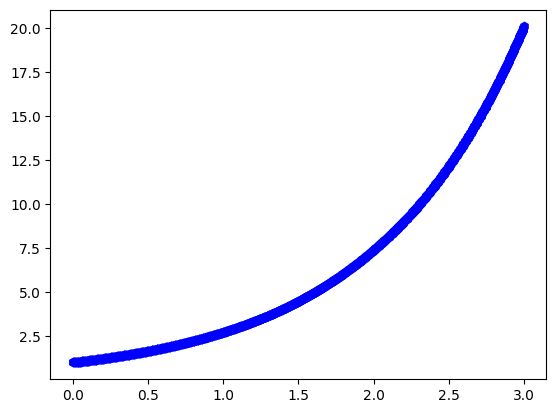

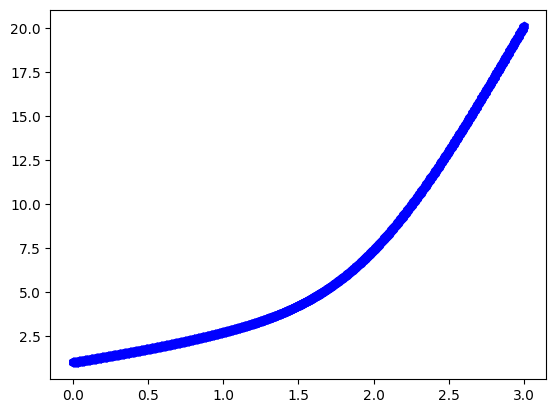

In [ ]:
sss = FixedCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)],1,np.exp(3))
nnn = NaturalCubicSpline([0,1, 2, 3], [np.exp(0),np.exp(1),np.exp(2),np.exp(3)])
plot(sss.polinom, [0, 3])
plot(nnn.polinom, [0, 3])
erroS = []
erroN = []
for x in np.linspace(0,3,1000):
    erroS.append(abs(sss.polinom(x)-np.exp(x)))
    erroN.append(abs(nnn.polinom(x)-np.exp(x)))
print(np.mean(erroS))
print(np.mean(erroN))



In [ ]:
def solve_tridiagonal(M,b):
    # resolve Mx=b
    # matriz A = [M | b]
    n = len(b)
    A = np.array([M[i]+[b[i]] for i in range(n)])
    print(A)

    X = np.array([0.0 for i in range(n)])

    L = np.array([[0.0 for i in range(n)] for j in range(n)])
    U = np.array([[0.0 for i in range(n)] for j in range(n)])
    z = np.array([0.0 for i in range(n)])
    # passo 1
    L[0,0] = A[0,0]
    U[0,1] = A[0,1]/L[0,0]
    z[0] = A[0,n]/L[0,0] 

    # passo 2       
    for i in range(1,n-1): 
        L[i,i-1] = A[i,i-1]
        L[i,i] = A[i,i]-L[i,i-1]*U[i-1,i]
        U[i,i+1] = A[i,i+1]/L[i,i]
        z[i] = (A[i,n] - L[i,i-1]*z[i-1])/L[i,i]
    
    # passo 3
    L[n-1,n-2] = A[n-1,n-2]
    L[n-1,n-1] = A[n-1,n-1] - L[n-1,n-2]*U[n-2,n-1]
    z[n-1] = (A[n-1,n]-L[n-1,n-2]*z[n-2])/L[n-1,n-1]

    # passo 4
    X[n-1] = z[n-1]

    # passo 5
    for i in range(n-2,-1,-1):
        X[i] = z[i] - U[i,i+1]*X[i+1]
    
    return X


In [ ]:
M = [[2,-1,0,0],[-1,2,-1,0],[0,-1,2,-1],[0,0,-1,2]]
b = [1,0,0,1]
solve_tridiagonal(M,b)

[[ 2 -1  0  0  1]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2  1]]


array([1., 1., 1., 1.])

In [ ]:

class HermiteDiferencesF:
    def __init__(self, x, y, Dy):
        # x vetor de mesmo tamanho que y
        self.x = [Fraction(x_) for x_ in x]
        self.y = [Fraction(y_) for y_ in y]
        self.Dy = [Fraction(dy) for dy in Dy]
        n = len(x)
        z = []
        #Q = np.zeros((2 * n, 2 * n))
        Q = np.array([[Fraction(0,1) for i in range(2*n)] for j in range(2*n)])
        for i in range(n):
            z.append(self.x[i])
            z.append(self.x[i])
            Q[2 * i, 0] = self.y[i]
            Q[2 * i + 1, 0] = self.y[i]
            Q[2 * i + 1, 1] = self.Dy[i]
            if i != 0:
                Q[2 * i, 1] = (Q[2 * i, 0] - Q[2 * i - 1, 0]) / (
                    z[2 * i] - z[2 * i - 1]
                )
        for i in range(2, 2 * n):
            for j in range(2, i + 1):
                Q[i, j] = (Q[i, j - 1] - Q[i - 1, j - 1]) / (z[i] - z[i - j])
        self.Q = Q
        self.z = z

        self.coefs = [Q[i,i] for i in range(len(Q))]

    def polinom(self, p):
        soma = 0
        for i in range(len(self.Q)):
            res = self.coefs[i]#self.Q[i, i]
            for j in range(i):
                res *= p - self.z[j]
            soma += res
        return soma



In [ ]:
#x = [0,0,3,3,5,5,8,8,13,13]
#y = [0,0,225,225,383,623,623,993,993]
x = [0,3,5,8,13]
y = [0,225,383,623,993]
dy = [75,77,80,74,72]

a = HermiteDiferences(x,y,dy)
a.polinom(10)
# p = np.poly1d(a.coefs)
# plinha = p.deriv(1)
# print(np.polyval(p,10))
# print(np.polyval(plinha,10))
# #a.coefs

742.5028390987709

In [ ]:
def deriv(f,x,h=0.0001):
    res = (f(x+h)-f(x))/h
    return res
    #for i in np.linspace(interval[0]+h,interval[1]-h,10000):


In [ ]:
deriv(a.polinom,3)

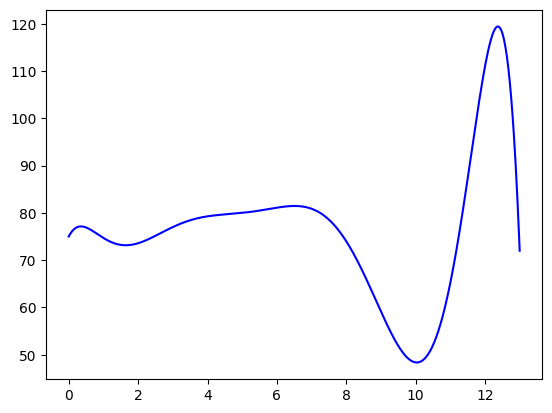

In [ ]:
def FL(x): return deriv(a.polinom,x)
t = np.linspace(0, 13, 1000)
A = [a.polinom(t_) for t_ in t]
B = [FL(t_) for t_ in t]

#plt.plot(t, A, 'r') # plotting t, a separately 
plt.plot(t, B, 'b') # plotting t, b separately 
plt.show()

In [ ]:
deriv(a.polinom,10)

48.38168899482298

In [ ]:
np.polyval(np.poly1d([1,2]),0)

2

In [ ]:
M = 0
for p in np.linspace(0, 13, 1000):
    if deriv(a.polinom,p) > M:
        M =deriv(a.polinom,p)
        P = p

print(P)
print(M)

12.375375375375375
119.41631825152399


In [ ]:
deriv(a.polinom,5.6607)

80.68159808715336

In [ ]:
np.exp(1)/2*1000000

1359140.9142295225

In [ ]:
i=10
math.factorial(i) < 1359140.9

False

In [ ]:
i = 0
def f(n): return 2**(-n/2)/math.factorial(n+1) 
K = 10e-6 * np.sqrt(2) / np.exp(1)
while f(i) > K:
    i+=1
print(i)
print(math.factorial(i))

7
5040


In [42]:
def E(x):
    return math.e/math.factorial(x+1)*(1/2)**((x+1)/2)

E(6)

4.767151572617953e-05

In [ ]:
def f(x):
    

In [ ]:
def f(x): return(math.factorial(x+1)*x*x)
for i in range(15):
    if f(i) > math.e*10**6: 
        print(i)
        break

8


In [ ]:
import math

In [ ]:
Fraction(-2,225)+Fraction(-61,300)

Fraction(-191, 900)

In [ ]:
a = [
    [2,225],
    [-61,300],
    [13,100],
    [-17,150],
    [11,96],
    [-33,800]
]

for i in range(len(a)-1):
    linha = a[i+1]
    atual = Fraction(linha[0],linha[1])
    antes = Fraction(a[i][0],a[i][1])
    print(atual - antes) 

-191/900
1/3
-73/300
547/2400
-187/1200


In [ ]:
x = [0,0,3,3,5,5,8,8,13,13]
y = [0,0,225,225,383,623,623,993,993]
dy = [75,75,77,79,80,80,74,74,72]

Mat = [y,dy]

for i in range(8):
    l = []
    for j in range(8-i):
        res = Mat[i+1][j-i-1] -  Mat[i+1][j]
        l.append(res)




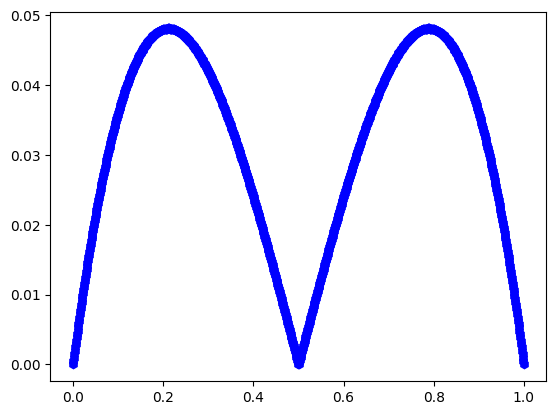

In [14]:
def ff(x): return f(x,2)
plot(ff,[0,1])

In [17]:
def f(x,n):
    res = 1
    for i in range(n+1):
        res *= x - i/n
    return abs(res)

def testaN(n):
    lista = [f(x,n) for x in np.linspace(0,1,10000)]
    erro = math.e/math.factorial(n+1) * max(lista)
    return erro

for n in range(1,10):
    print('---')
    t = testaN(n)
    print(n)
    print(t)
    print(t<10e-6)

---
1
0.3397852251588487
False
---
2
0.021797232569449633
False
---
3
0.001398293116225115
False
---
4
8.033248642141412e-05
False
---
5
4.0836794514695295e-06
True
---
6
1.8465472495914484e-07
True
---
7
7.491644446731834e-09
True
---
8
2.7510249642702776e-10
True
---
9
9.216646748399395e-12
True


In [32]:
n=5
x = np.array(list(range(n+1)))/n
y = np.exp(x)
p = NumpyLagrange(x,y)
erro = []
for p_ in np.linspace(0,1,100000):
    erro.append(abs(np.exp(p_)-np.polyval(p,p_)))

max(erro) < 10e-6

True

[0 1 2 3 4]
           4             3             2
5.551e-17 x - 8.882e-16 x + 4.441e-16 x + 2 x


2.877698079828406e-13

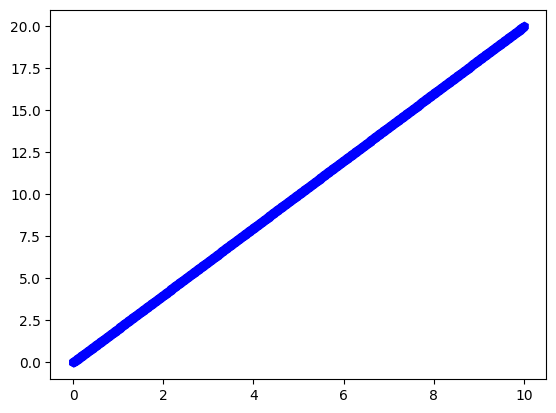

In [40]:
n = 4
x = np.array(list(range(n+1)))
print(x)
y = 2*x
p = NumpyLagrange(x,y)
def f(x): return np.polyval(p,x)
plot(f,[0,10])

LX = np.linspace(0,10,10000)
e = abs(f(LX) - 2*LX)
print(p)
max(e)